## Universidad del Valle de Guatemala
## Modelado y Simulacion

### MICRO PROYECTO 1


#### Juan Marroquin 19845
#### Carlos Raxtum 19721

###### import libraries

In [14]:
from scipy.stats import poisson
from matplotlib import pyplot as plt
from math import exp, pow, factorial, log
import numpy as np
from scipy.stats import gamma
import random

### Ejercicio 1

Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la
probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en
otras palabras, el número promedio de huracanes por año es de 7.

+ 1. ¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?
+ 2. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass function) de estos eventos
+ 3. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative distribution function) de estos eventos
+ 4. ¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?

### ¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?

In [2]:
min_h = 0 
max_h = 16 
avarage_h = 7

In [3]:
h_values = []
y_values = []

In [4]:
for x in range(max_h + 1):
  h_values.append(x)
  y_values.append(poisson.pmf(k=x, mu=avarage_h))

### Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass function) de estos eventos

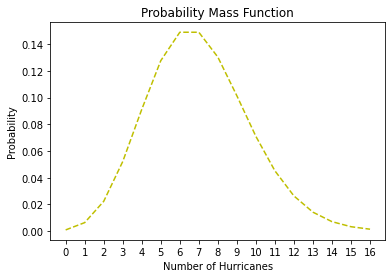

In [5]:
plt.plot(h_values, y_values, 'y--')
plt.xticks(h_values)
plt.title("Probability Mass Function")
plt.xlabel('Number of Hurricanes')
plt.ylabel('Probability')
plt.show()

### Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative distribution function) de estos eventos

In [6]:
y_values = []
i = 0
while i <= 16:
    y_values.append(poisson.cdf(k=i, mu=7))
    i += 1

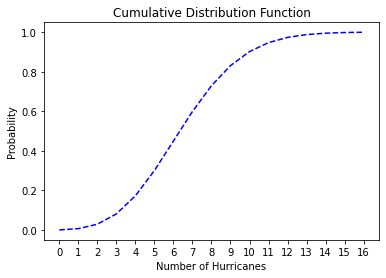

In [7]:
plt.plot(h_values, y_values, 'b--')
plt.xticks(h_values)
plt.title("Cumulative Distribution Function")
plt.xlabel('Number of Hurricanes')
plt.ylabel('Probability')
plt.show()

### ¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?

### Ejercicio 2
Suponga que la cantidad promedio de buses que llegan a una parada de bus dada es de 2 cada 30 minutos.
Considere X como la cantidad de buses que llegan a la mencionada parada de bus.

+ 1. ¿Puede ser este evento modelado por una distribución de Poisson? ¿Por qué?
+ 2. Calcule y grafique la probabilidad para diferentes números de buses, yendo desde 0 hasta 100. ¿Cuál es la cantidad de buses más probable?


### ¿Puede ser este evento modelado por una distribución de Poisson? ¿Por qué?

### Calcule y grafique la probabilidad para diferentes números de buses, yendo desde 0 hasta 100. ¿Cuál es la cantidad de buses más probable?

In [8]:
min_b = 0 
max_b = 100 
avarage_b = 2

In [9]:
b_values = []
y_values = []

In [10]:
for x in range(max_b + 1):
  b_values.append(x)
  y_values.append(poisson.pmf(k=x, mu=avarage_b))

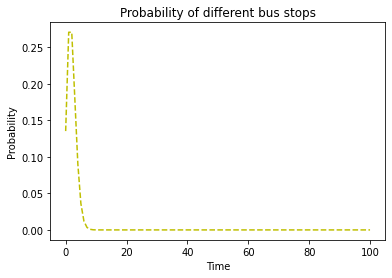

In [11]:
plt.plot(b_values, y_values, 'y--')
plt.title("Probability of different bus stops")
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()

### Ejercicio 3
Un aspecto importante de los procesos de Poisson es que los intervalos de tiempo entre eventos consecutivos
puede ser modelado usando una distribución exponencial, a pesar de que esta última sea contínua. Considerando
esto para generar tiempos intermedios en un proceso de Poisson, usamos la técnica de invertir la CDF, en la cual
literalmente se construye la inversa de la CDF, y se le da como input diferentes valores de una distribución
uniforme. Esto da como resultado los correspondientes tiempos intermedios con sus respectivas probabilidades.

+ 1. Genere una tabla que muestre los tiempos intermedios en horas para los 10 primeros pacientes
+ 2. Grafique usando el mismo lambda la CDF para la variable exponencial.
+ 3. Haga una gráfica de los tiempos intermedios para los primeros 500 pacientes. ¿Qué forma tiene la gráfica? ¿Cuál es la relación que se observa entre esta y la gráfica del punto anterior?

### Genere una tabla que muestre los tiempos intermedios en horas para los 10 primeros pacientes

In [12]:
def poissonMedTime(x, lambda_val):
  if x < 1:
    return - (log(1 - x) / lambda_val)
  else: 
        return 0

In [18]:
lambda_val = 5
max_pacientes = 10

p_values = []
y_values = []

#Set the seed so that this gives the same results always.
random.seed(6000)

for paciente in range(max_pacientes + 1):
  p_values.append(paciente)
  y_values.append(poissonMedTime(random.random(), lambda_val))

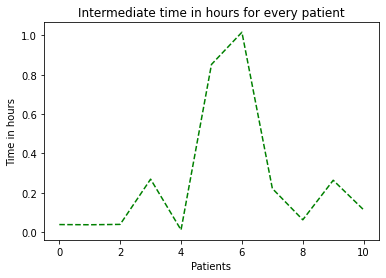

In [19]:
plt.plot(p_values, y_values, 'g--')
#plt.xticks(xvalues)
plt.title("Intermediate time in hours for every patient")
plt.xlabel('Patients')
plt.ylabel('Time in hours')
plt.show()

### Grafique usando el mismo lambda la CDF para la variable exponencial.

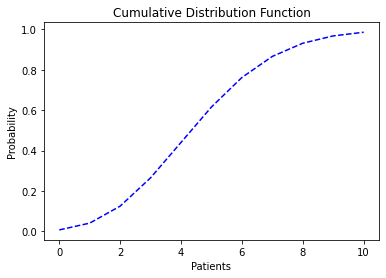

In [23]:
y_values = []
i = 0
while i <= 10:
    y_values.append(poisson.cdf(k=i, mu=5))
    i += 1
plt.plot(p_values, y_values, 'b--')
plt.title("Cumulative Distribution Function")
plt.xlabel('Patients')
plt.ylabel('Probability')
plt.show()

### Haga una gráfica de los tiempos intermedios para los primeros 500 pacientes. ¿Qué forma tiene la gráfica?

In [24]:
lambda_val = 5
max_pacientes = 500

p_values = []
y_values = []


#Set the seed so that this gives the same results always.
random.seed(6000)

for paciente in range(max_pacientes + 1):
  p_values.append(paciente)
  y_values.append(poissonMedTime(random.random(), lambda_val))

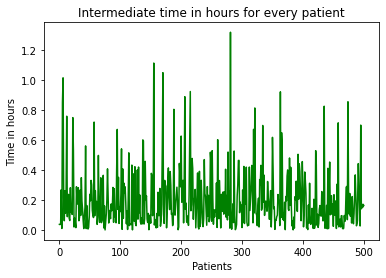

In [25]:
plt.plot(p_values, y_values, 'g-')
plt.title("Intermediate time in hours for every patient")
plt.xlabel('Patients')
plt.ylabel('Time in hours')
plt.show()

### Ejercicio 4
Con la información que hemos recabado del ejercicio anterior, es fácil generar las llegadas de los pacientes a la
clínica veterinaria. Pues, si consideramos x1 = tiempo de llegada del primer paciente = tiempo intermedio para el
primer paciente, y x2 = tiempo de llegada del segundo paciente = x1 + tiempo intermedio para el segundo paciente
= x1 + x2, para x3 = tiempo de llegada del tercer paciente = x1 + x2 + tiempo intermedio para el tercer paciente = x1 + x2 + x3.

Considerando que X1, X2, … Xk son los tiempos intermedios, si definimos T1, T2, … Tk como las variables que
representarán las llegadas de los pacientes a la clínica veterinaria, vemos que
T1 = X1
T2 = X1 + X2
Tk = X1 + X2 + … + Xk

* 1. ¿Son las variables T1, T2 hasta Tk variables aleatorias? ¿Por qué?
+ 2. Simule y grafique el proceso de Poisson completo usando el mismo gamma e información recabada del ejercicio 2. Haga una simulación para 100 pacientes.


### ¿Son las variables T1, T2 hasta Tk variables aleatorias? ¿Por qué?

### Simule y grafique el proceso de Poisson completo usando el mismo gamma e información recabada del ejercicio 2. Haga una simulación para 100 pacientes.

### Ejercicio 5
Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada

+ 1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.
+ 2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de
ocurrencias de un evento?

### Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos

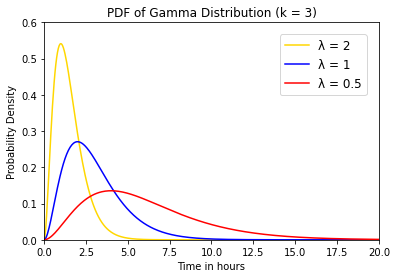

In [28]:
k = 3  # k = 10
x = np.linspace(0, 50, 1000)

lambda_val = 2
y_1 = gamma.pdf(x, k, scale=1/lambda_val)

lambda_val = 1
y_2 = gamma.pdf(x, k, scale=1/lambda_val)

lambda_val = 0.5
y_3 = gamma.pdf(x, k, scale=1/lambda_val)



plt.title("PDF of Gamma Distribution (k = "+str(k)+")")
plt.xlabel("Time in hours")
plt.ylabel("Probability Density")
plt.plot(x, y_1, label="λ = 2", color='gold')
plt.plot(x, y_2, label="λ = 1", color='blue')
plt.plot(x, y_3, label="λ = 0.5", color='red')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.ylim([0, 0.60])
plt.xlim([0, 20])
plt.show()

### ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de ocurrencias de un evento?